1. See code [below](#Generate-$A$)

2. See plots [below](#Press-pattern)

3. See result [below](#Null-size)

4. A simple example for $5x5$ is

    $$
    \begin{array}{ccccc}
    1&1&0&1&1\\
    0&0&0&0&0\\
    1&1&0&1&1\\
    0&0&0&0&0\\
    1&1&0&1&1\\
    \end{array}
    $$

    And it's transpose.


In [1]:
using PyPlot

In [2]:
include("bin_num.jl")

solve_lu (generic function with 1 method)

#### Generate $A$

In [3]:
function gen_flip_mat(m, n=m)
    mn = n * m
    mat = zeros(BinNum, mn, mn)
    @inbounds for x in 0:(m - 1)
        for y in 1:n
            i = x * n + y
            mat[i, i] = 1
            # Bounds checks
            y == n || (mat[i + 1, i] = 1)
            y == 1 || (mat[i - 1, i] = 1)
            x == (n - 1) || (mat[i + n, i] = 1)
            x == 0 || (mat[i - n, i] = 1)
        end
    end
    mat
end

gen_flip_mat (generic function with 2 methods)

In [4]:
function show_pattern(ary, m=round(Int, sqrt(length(ary))))
    len = length(ary)
    n = len ÷ m
    @assert len == m * n
    # somehow matshow crashes IJulia...
    imshow(reshape(map(Int, ary), (m, n)), interpolation="none",
           cmap=ColorMap("bwr"))
end

show_pattern (generic function with 2 methods)

In [5]:
const flip7 = gen_flip_mat(7);

In [6]:
const goal7_1 = reshape(BinNum[abs(x - 4) + abs(y - 4) <= 3 for x in 1:7, y in 1:7], 7^2);
const goal7_2 = reshape(BinNum[1 < x < 7 && 1 < y < 7 for x in 1:7, y in 1:7], 7^2);
const goal7_3 = reshape(BinNum[x == 4 && y == 4 for x in 1:7, y in 1:7], 7^2);
const goal7_4 = reshape(BinNum[x == 7 && y == 1 for x in 1:7, y in 1:7], 7^2);
const goal7_5 = reshape(BinNum[x == 5 && y == 1 for x in 1:7, y in 1:7], 7^2);

#### Press pattern

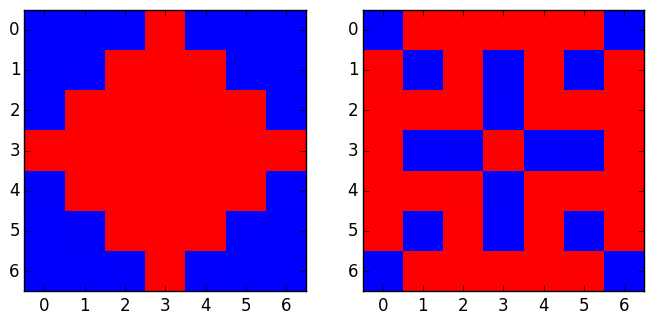

PyObject <matplotlib.image.AxesImage object at 0x7f1069d6d710>

In [7]:
fig, (ax1, ax2)= subplots(1, 2)
sca(ax1)
show_pattern(goal7_1)
sca(ax2)
show_pattern(solve_lu(flip7, goal7_1))

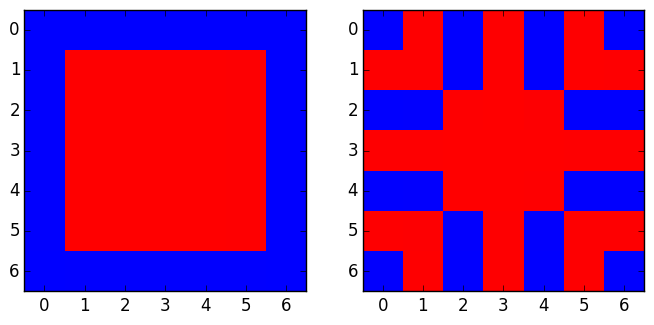

PyObject <matplotlib.image.AxesImage object at 0x7f10663a59b0>

In [8]:
fig, (ax1, ax2)= subplots(1, 2)
sca(ax1)
show_pattern(goal7_2)
sca(ax2)
show_pattern(solve_lu(flip7, goal7_2))

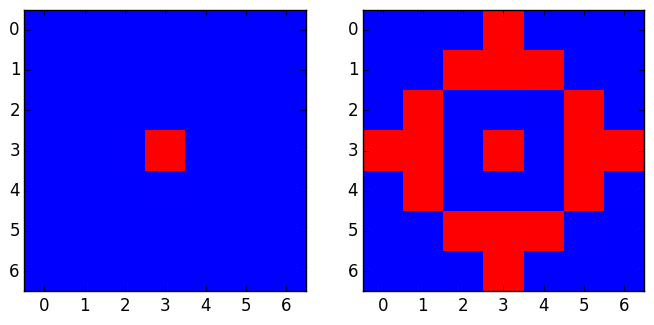

PyObject <matplotlib.image.AxesImage object at 0x7f106627e128>

In [9]:
fig, (ax1, ax2)= subplots(1, 2)
sca(ax1)
show_pattern(goal7_3)
sca(ax2)
show_pattern(solve_lu(flip7, goal7_3))

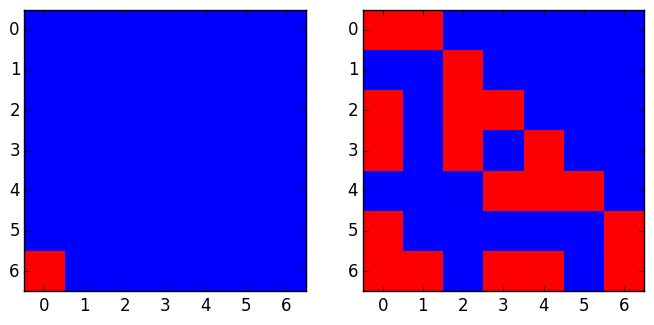

PyObject <matplotlib.image.AxesImage object at 0x7f10661c6978>

In [10]:
fig, (ax1, ax2)= subplots(1, 2)
sca(ax1)
show_pattern(goal7_4)
sca(ax2)
show_pattern(solve_lu(flip7, goal7_4))

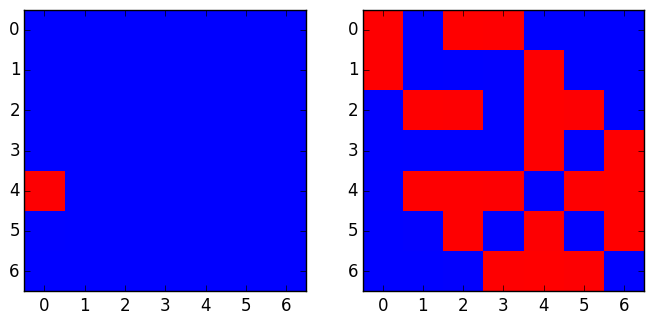

PyObject <matplotlib.image.AxesImage object at 0x7f10661147b8>

In [11]:
fig, (ax1, ax2)= subplots(1, 2)
sca(ax1)
show_pattern(goal7_5)
sca(ax2)
show_pattern(solve_lu(flip7, goal7_5))

In [12]:
const flip100 = gen_flip_mat(100);

In [13]:
# Random image just for fun...
const goal100_1 = reshape(BinNum[rand(Bool) for x in 1:100, y in 1:100], 100^2);

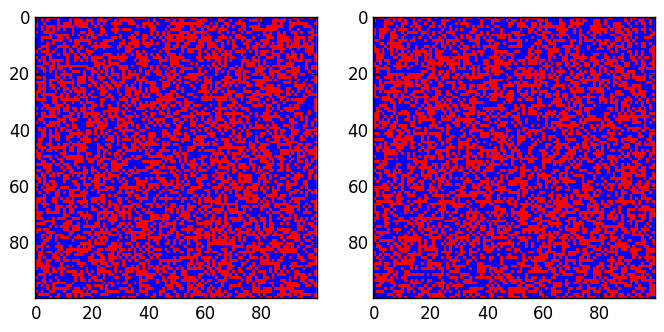

PyObject <matplotlib.image.AxesImage object at 0x7f10600d6be0>

In [14]:
fig, (ax1, ax2)= subplots(1, 2)
sca(ax1)
show_pattern(goal100_1)
sca(ax2)
show_pattern(solve_lu(flip100, goal100_1))

In [15]:
function calc_null(m, n)
    mat = gen_flip_mat(m, n)
    L, U, P = lu(mat)
    null_size = 0
    for i in 1:(m * n)
        U[i, i].v || (null_size += 1)
    end
    null_size
end

calc_null (generic function with 1 method)

#### Null size

In [16]:
# Segfault for larger size... =(. Will investigate later.
null_sizes = [calc_null(m, n) for m in 1:9, n in 1:9]

9x9 Array{Int64,2}:
 0  1  0  0  1  0  0  1  0
 0  0  0  0  1  2  1  2  0
 1  1  0  0  1  1  0  0  2
 0  0  0  4  2  0  2  1  1
 0  2  2  4  2  1  0  1  2
 1  0  0  4  3  0  1  1  0
 0  1  0  4  3  0  0  0  3
 0  0  3  8  5  0  0  0  0
 1  2  0  4  2  0  2  1  8